In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [2]:
data_water = pd.read_csv(os.path.join('C:', os.sep, 'Netology', 'water.csv'))

In [3]:
data_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


# Корреляция

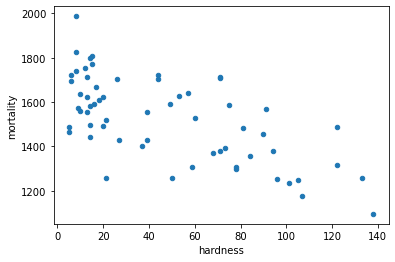

In [8]:
# точечный график

data_water.plot(kind='scatter', x='hardness', y='mortality');

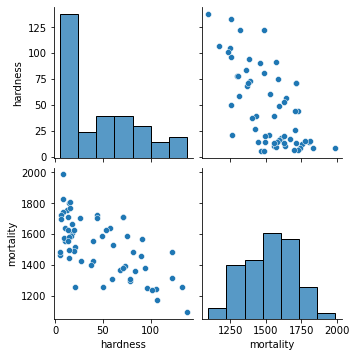

In [7]:
sns.pairplot(data_water[['hardness','mortality']]);

In [9]:
# коэффициент корреляции Пирсона

data_water[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:
# коэффициент корреляции Спирмена

data_water[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [11]:
# коэффициент корреляции Кенделла

data_water[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


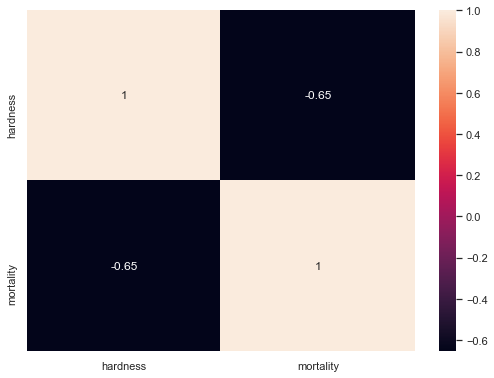

In [12]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_water[['hardness','mortality']].corr(), annot=True);

# Выводы:
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена умеренно сильная по методу Спирмена.
3. Гипотеза: чем выше сметрность, тем ниже жесткость воды, и наоборот.

# Регрессия

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = data_water[['hardness']]
y = data_water['mortality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
X_train.shape

(42, 1)

In [17]:
X_test.shape

(19, 1)

In [18]:
y_train.shape

(42,)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [20]:
# коэффициент линейной регрессии

model.coef_

array([-3.13167087])

In [21]:
model.intercept_

1668.9722977277095

In [22]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [23]:
# значение коэффициента детерминации

model.score(X_test, y_test) 

0.5046490611017092

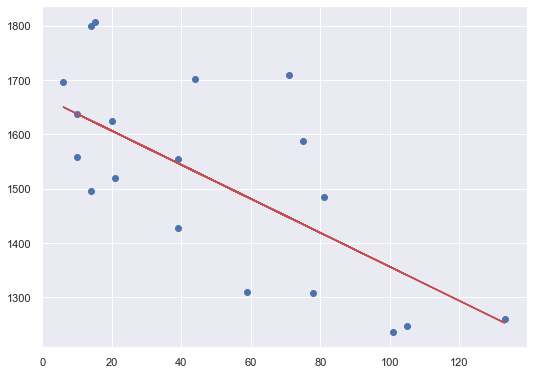

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [25]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [28]:
X_const.shape

(42, 2)

In [29]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [30]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        11:34:35   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [31]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.396789010091228


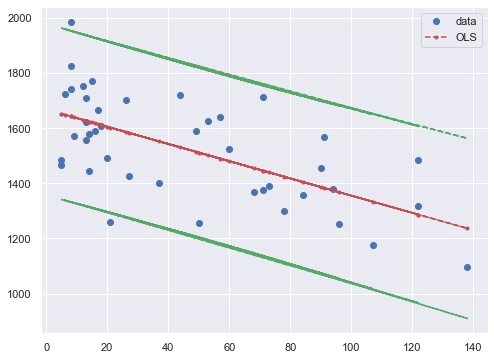

In [32]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

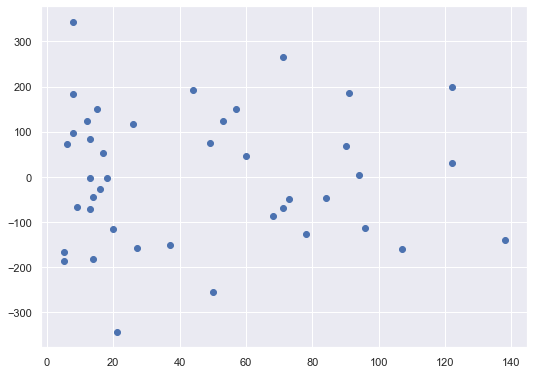

In [35]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid);

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

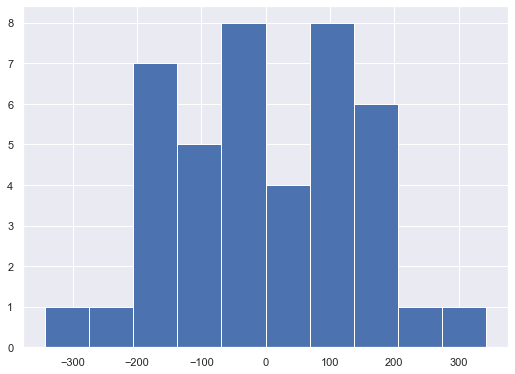

In [36]:
plt.hist(results.resid)

# Выводы:
1. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент)
2. Сильный разброс фактических данных вокруг модели, для небольшого количества данных прогноз работает.
3. Коэффициент детерминации равен 0.50 то есть на 50% жесткость воды обусловлена показателями сметрности.
4. Остатки распределены случайны, взаимосвязь отсутствует, распределение остатков носит вид колокола, что говорит о нормальном распределении.

## Зависимость для северных и южных городов по отдельности

In [37]:
data_north = data_water.loc[data_water.location == 'North']
data_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [38]:
data_south = data_water.loc[data_water.location == 'South']
data_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


# Север

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


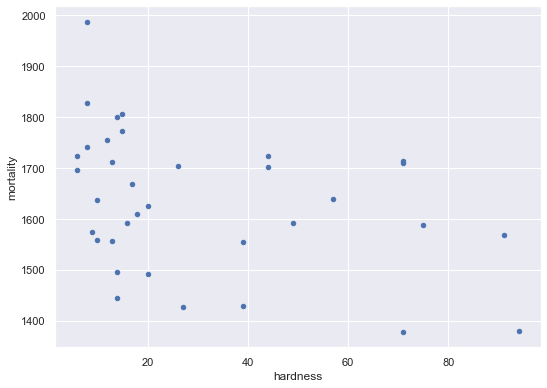

In [39]:
data_north.plot(kind='scatter', x='hardness', y='mortality');

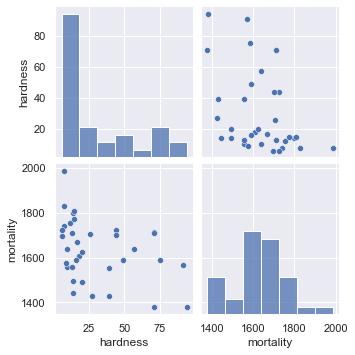

In [40]:
sns.pairplot(data_north[['hardness','mortality']]);

In [41]:
# коэффициент корреляции Пирсона

data_north[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [42]:
# коэффициент корреляции Спирмена

data_north[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [43]:
# коэффициент корреляции Кенделла

data_north[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


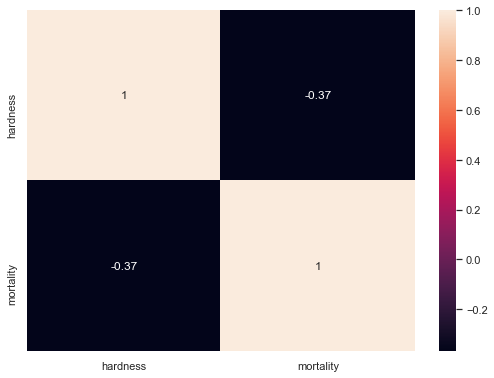

In [45]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_north[['hardness','mortality']].corr(), annot=True);

In [46]:
X_north = data_north[['hardness']]
y_north = data_north['mortality']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)

In [48]:
X_train.shape

(24, 1)

In [49]:
X_test.shape

(11, 1)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [51]:
# коэффициент линейной регрессии

model.coef_

array([-1.97686226])

In [52]:
model.intercept_

1688.150229031281

In [53]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [54]:
# значение коэффициента детерминации

model.score(X_test, y_test) 

0.018885304285745863

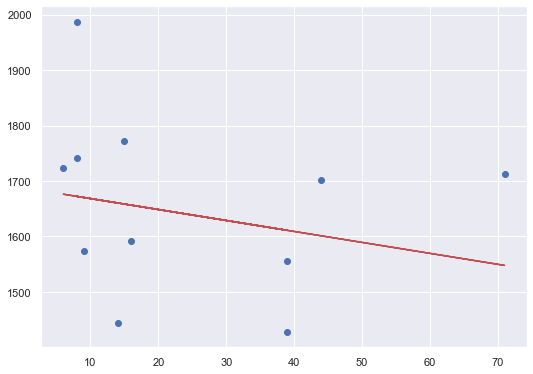

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_north, y_north, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу
X_const.shape

(24, 2)

In [57]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [58]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Mon, 07 Jun 2021   Prob (F-statistic):             0.0316
Time:                        11:40:35   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [59]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1688.150229
hardness      -1.976862
dtype: float64
R2:  0.19322282610033525


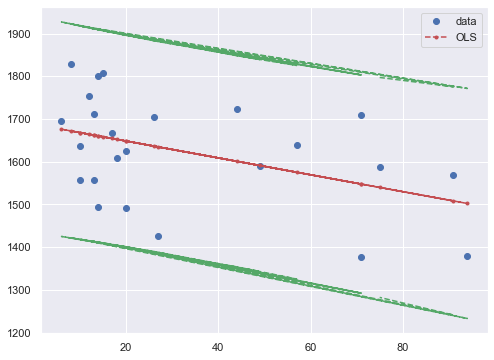

In [60]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

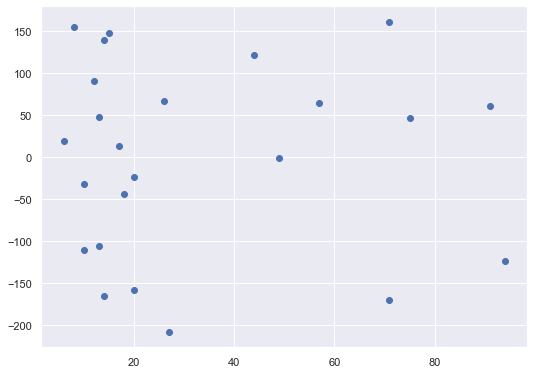

In [62]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid);

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <BarContainer object of 10 artists>)

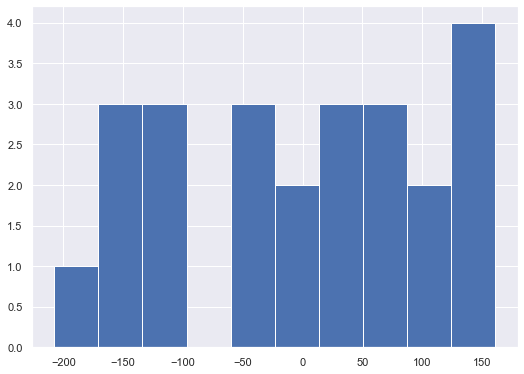

In [63]:
plt.hist(results.resid)

# Юг

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

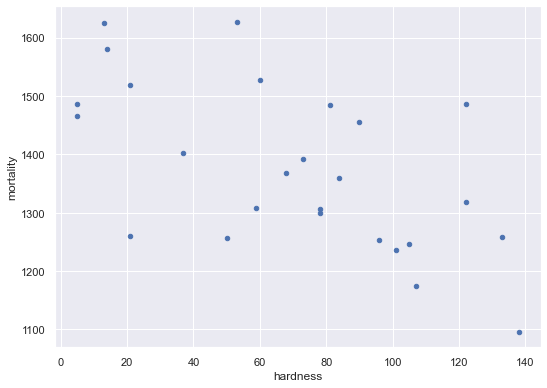

In [64]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

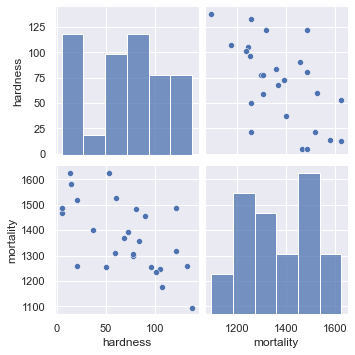

In [65]:
sns.pairplot(data_south[['hardness','mortality']]);

In [66]:
# коэффициент корреляции Пирсона

data_south[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [67]:
# коэффициент корреляции Спирмена

data_south[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [68]:
# коэффициент корреляции Кенделла

data_south[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


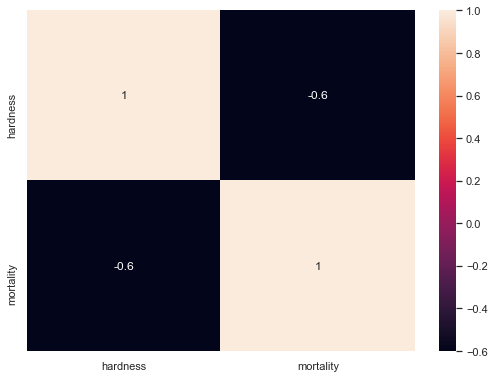

In [69]:
sns.set(rc={'figure.figsize':(8.7, 6.27)})
sns.heatmap(data_south[['hardness','mortality']].corr(), annot=True);

In [70]:
X_south = data_south[['hardness']]
y_south = data_south['mortality']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [72]:
X_train.shape

(18, 1)

In [73]:
X_test.shape

(8, 1)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [75]:
# коэффициент линейной регрессии

model.coef_

array([-3.51342921])

In [76]:
model.intercept_

1640.2204603423374

In [77]:
# прогноз

y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [78]:
# значение коэффициента детерминации

model.score(X_test, y_test)

-2.5519223012352077

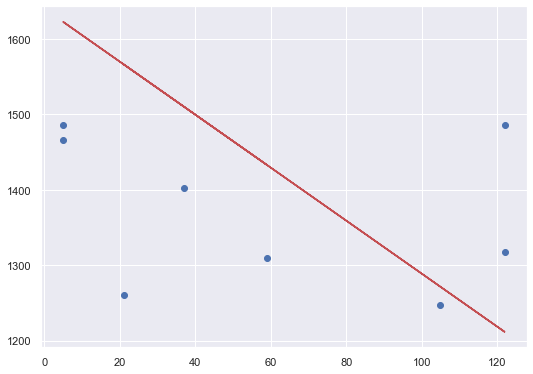

In [79]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [81]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [82]:
X_const.shape

(18, 2)

In [83]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [84]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.30e-05
Time:                        11:45:49   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

C:\Users\ivana\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [85]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.6363808308877189


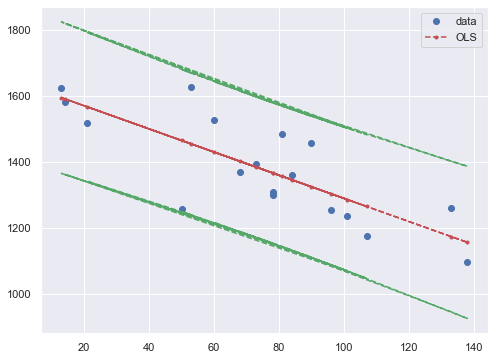

In [86]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

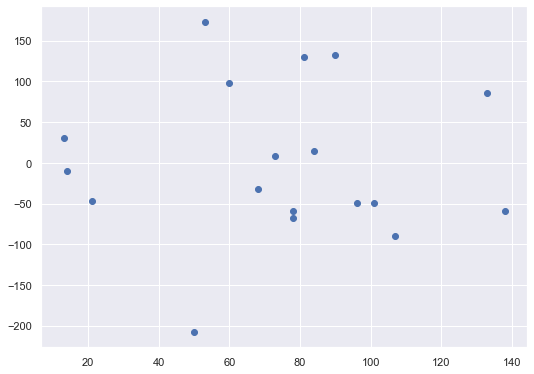

In [89]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid);

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

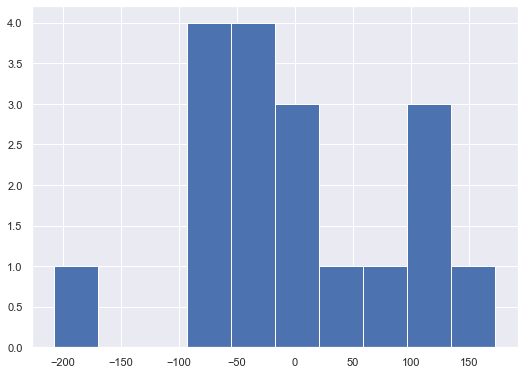

In [88]:
plt.hist(results.resid)

# Выводы:
## По Cеверу
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена слабо по методу Спирмена.
3. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент), регрессия слабая.
4. Сильный разброс фактических данных вокруг модели, для небольшого количества данных прогноз работает.
5. Коэффициент детерминации равен 0.18 то есть на 18% жесткость воды обусловлена показателями сметрности, коэффициент низкий, зависимость слабоя.
6. Остатки распределены случайны, распределение остатков носит вид половины колокола, что говорит о ненормальном распределении.

## По Югу:
1. Между жесткостью воды и смертностью, обратная взаимосвязь, коэффициент корреляции отрицательный.
2. Линейная связь между жесткостью воды и смертностью выражена умеренно сильная по методу Спирмена.
3. Коэффициент регрессии говорит, что чем больше жесткость воды тем меньше смертность (отрицательный коэффициент), регрессия слабая.
4. Средний разброс фактических данных вокруг модели, для пловины количества данных прогноз работает.
5. Коэффициент детерминации равен 0.63 то есть на 63% жесткость воды обусловлена показателями сметрности, коэффициент средний, зависимость заметная.
5. Остатки распределены случайны, взаимосвязь отсутствует, распределение остатков носит вид колокола, что говорит о нормальном распределении.


### Зависимость для городов по отдельности не сохраняется, зависимость городов Юга похожа на общую, зависимость городов Севера отличается от общей.